## Handwritten img classification

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow import keras
import pandas as pd

In [9]:
a = keras.datasets.mnist.load_data()

In [11]:
a

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [12]:
df= pd.DataFrame(a)  ## maybe not legible coz it has images

In [14]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
len(X_train)

60000

In [17]:
len(X_test)

10000

In [18]:
X_train[0].shape  ##pixel of img

(28, 28)

In [19]:
X_train[0]            ##image 0-255 , 0 rep black 1 rep white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [20]:
print(type(X_train))

<class 'numpy.ndarray'>


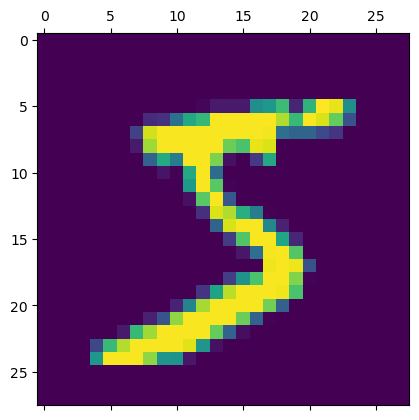

In [23]:
plt.matshow(X_train[0])

In [24]:
y_train[0]

5

In [25]:
X_train = X_train / 255  ## Normaliztion/standardization just to make dataset less complicated and easy to feed
X_test = X_test / 255      ## ignoring this could result in badly performing model

In [26]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [31]:
X_train.shape

(60000, 28, 28)

In [28]:
## Flattening would shrink your array, here 3d to 2d
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [29]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
X_train_flattened.shape

(60000, 784)

In [33]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<img src="digits_nn.jpg" />

### Training & Testing

In [35]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')   ## 10 the val of imgs
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4644 - accuracy: 0.8792
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3036 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2732 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2665 - accuracy: 0.9252


In [36]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2687 - accuracy: 0.9254


[0.268696129322052, 0.9254000186920166]

In [37]:
## Demo of pred
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 2s 2ms/step


array([2.9699456e-02, 6.3011686e-07, 5.2625358e-02, 9.5928937e-01,
       3.1755178e-03, 1.3046238e-01, 2.7680885e-06, 9.9984735e-01,
       1.3357244e-01, 7.1222275e-01], dtype=float32)

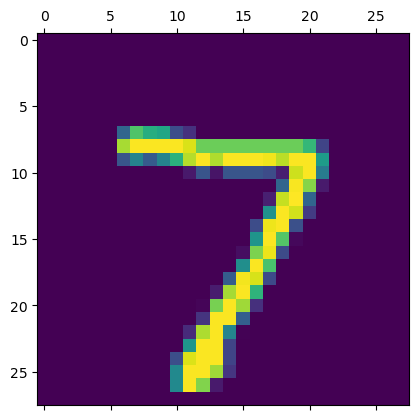

In [38]:
plt.matshow(X_test[0])

In [39]:
## np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[0])     ##phew! predicted it right

7

In [40]:
## saving all _pred inside labels variable 
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [41]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

## confusion matrix

In [42]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    5,   10,    2,    3,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   4,   10,  929,   11,    7,    4,   13,   11,   40,    3],
       [   3,    1,   20,  908,    0,   30,    3,   14,   25,    6],
       [   1,    1,    4,    2,  919,    0,   12,    4,   11,   28],
       [   8,    3,    4,   19,   11,  774,   18,    8,   40,    7],
       [   8,    3,    8,    1,    7,    9,  918,    2,    2,    0],
       [   1,    6,   22,    5,    7,    0,    0,  958,    5,   24],
       [   4,    8,    6,   16,    9,   20,    9,   13,  885,    4],
       [   8,    7,    2,    9,   36,    6,    0,   35,   13,  893]])>

Text(95.72222222222221, 0.5, 'Truth')

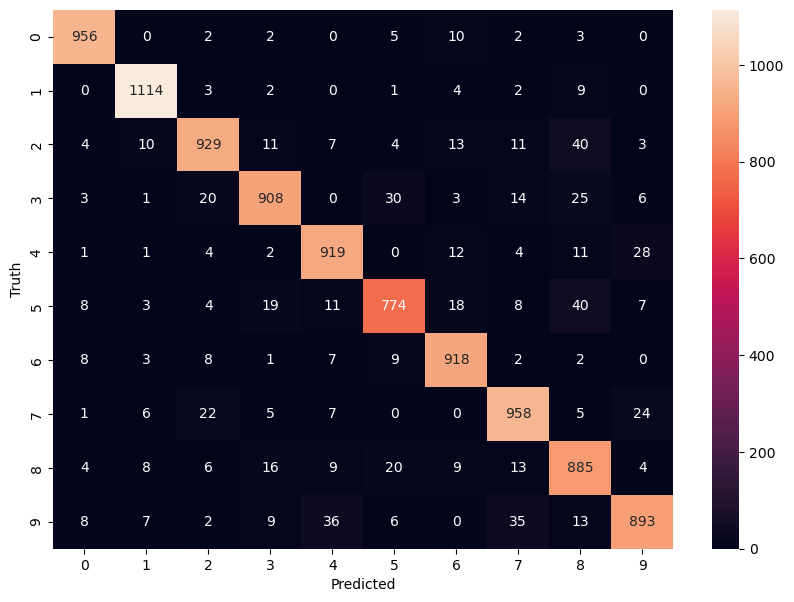

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Exploiting Hidden layers

In [44]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), ##100 neurons,1st layyer
    keras.layers.Dense(10, activation='sigmoid')   ## 2nd layer,sigmoid->output between 0 and 1, which can be useful for binary 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2731 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1245 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0867 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0657 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0520 - accuracy: 0.9840


In [45]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0838 - accuracy: 0.9743


[0.083844393491745, 0.9743000268936157]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

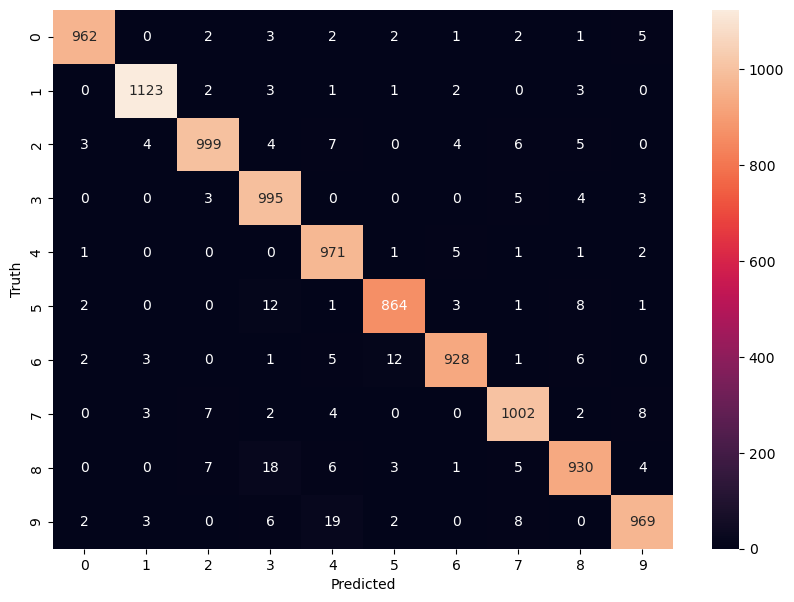

In [46]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')